In [5]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/tree_large.pkl")
#res_ex = load_pickle_zip("../models/solutions/tree.pkl")

In [9]:
betas = np.arange(0.1,2.1,1e-1)

In [10]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=2000, bias = True,
                            std_fe_limit=1e-04,
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -6.981 std_fe: 1.01E-04 M: 0.008 S: 0.688 E: -0.099: 0.0279, B1 = -0.000
fe: -3.564 std_fe: 1.02E-04 M: 0.007 S: 0.674 E: -0.195: 0.0205, B1 = 0.0000
fe: -2.457 std_fe: 9.96E-05 M: 0.007 S: 0.651 E: -0.288: 0.0214, B1 = -0.001
fe: -1.926 std_fe: 9.93E-05 M: 0.008 S: 0.620 E: -0.376 0.0232, B1 = 0.0000
fe: -1.625 std_fe: 9.93E-05 M: 0.008 S: 0.583 E: -0.459 0.022, B1 = 0.00110
fe: -1.436 std_fe: 1.03E-04 M: 0.007 S: 0.543 E: -0.532 0.0264, B1 = -0.000
fe: -1.312 std_fe: 9.76E-05 M: 0.009 S: 0.498 E: -0.600 0.0276, B1 = 0.0000
fe: -1.227 std_fe: 9.98E-05 M: 0.007 S: 0.454 E: -0.659 0.0288, B1 = -0.002
fe: -1.167 std_fe: 1.00E-04 M: 0.008 S: 0.410 E: -0.711 0.0254, B1 = -0.001
fe: -1.123 std_fe: 1.01E-04 M: 0.006 S: 0.370 E: -0.754 0.0253, B1 = -0.001
fe: -1.092 std_fe: 9.98E-05 M: 0.008 S: 0.328 E: -0.794 0.0156, B1 = 0.0030
fe: -1.068 std_fe: 1.01E-04 M: 0.007 S: 0.290 E: -0.827 0.024, B1 = -0.0011
fe: -1.051 std_fe: 1.00E-04 M: 0.008 S: 0.256 E: -0.854 0.025, B1 = 0.00220
fe: -1.03

In [11]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

 0.10 4910 fe: -6.981 +- 0.00002 E: -0.098, S: 0.688, M: 0.0242, B1 = -0.012

KeyboardInterrupt: 

In [ ]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = False, 
                           x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

In [12]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -6.981, ener: -0.099, M: 0.000, iter 6
fe: -3.564, ener: -0.196, M: 0.000, iter 6
fe: -2.457, ener: -0.289, M: 0.000, iter 6
fe: -1.926, ener: -0.377, M: 0.000, iter 6
fe: -1.625, ener: -0.458, M: 0.000, iter 6
fe: -1.436, ener: -0.533, M: 0.000, iter 6
fe: -1.312, ener: -0.599, M: 0.000, iter 6
fe: -1.227, ener: -0.659, M: 0.000, iter 6
fe: -1.167, ener: -0.710, M: 0.000, iter 6
fe: -1.123, ener: -0.755, M: 0.000, iter 6
fe: -1.092, ener: -0.794, M: 0.000, iter 6
fe: -1.068, ener: -0.827, M: 0.000, iter 6
fe: -1.051, ener: -0.855, M: 0.000, iter 6
fe: -1.038, ener: -0.878, M: 0.000, iter 6
fe: -1.028, ener: -0.898, M: 0.000, iter 6
fe: -1.020, ener: -0.914, M: 0.000, iter 6
fe: -1.014, ener: -0.928, M: 0.000, iter 6
fe: -1.010, ener: -0.939, M: 0.000, iter 6
fe: -1.006, ener: -0.948, M: 0.000, iter 6
fe: -1.004, ener: -0.956, M: 0.000, iter 6


In [13]:
res_ex = res_bp

In [14]:
from save_data import save_pickle_zip
name_file="tree_large"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [15]:
from save_data import load_pickle_zip
all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_bp = all_res["bp"]

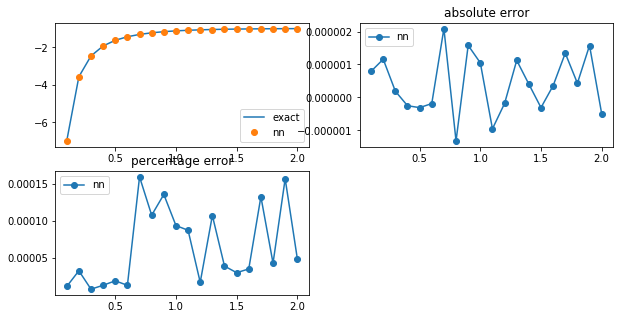

In [16]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_nn], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

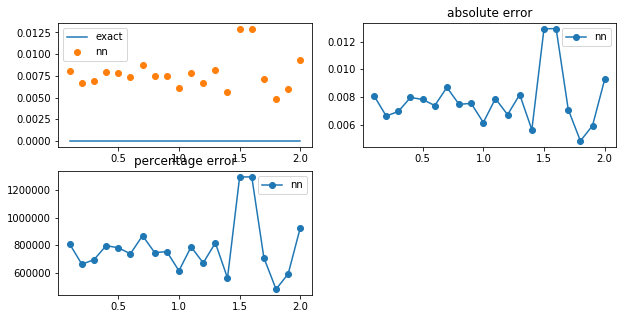

In [17]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_nn])
plt.show()

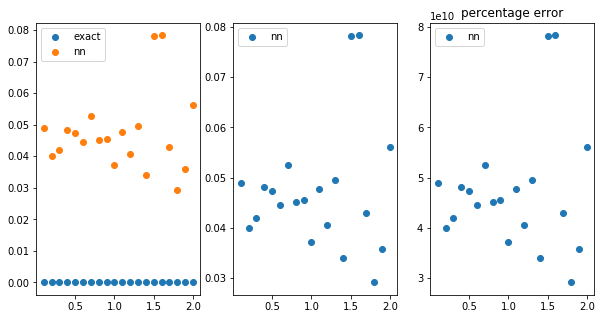

In [18]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_nn], init_=0)
plt.show()

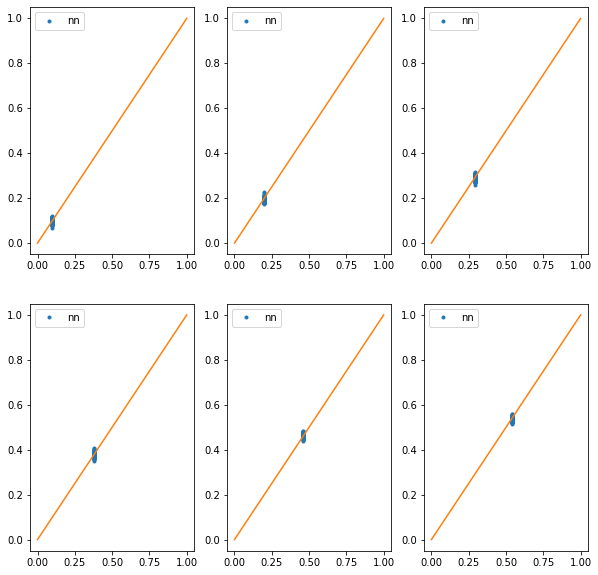

In [19]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_nn], model_.J_interaction)
plt.show()

# Plots

<function matplotlib.pyplot.show(*args, **kw)>

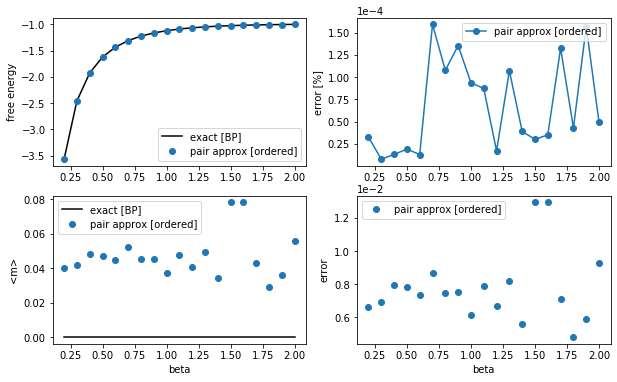

In [25]:
import matplotlib.pyplot as plt
init_ =1
name_file = "tree_large.pdf"
label="fe"

others = [res_nn]
res_nn["name"] = "pair approx [ordered]"
plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact [BP]",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

others = [res_nn]

res_nn["name"] = "pair approx [ordered]"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/len(res_ex[label]),
             label="exact [BP]", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/len(other[label]), "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show